In [ ]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 📂 Carpeta con tus imágenes originales
ruta_base = Path(r"C:\Users\PC\Desktop\materia 2025\segundo semestre\tesis\indice de jenkins\base de datos\5_semana")

# Kernel para erosión 2x2
kernel = np.ones((2, 2), np.uint8)

# Obtener todas las imágenes .jpg, .png o .jpeg
archivos = [f for f in ruta_base.iterdir() if f.suffix.lower() in [".jpg", ".png", ".jpeg"]]

print(f"🔍 Se encontraron {len(archivos)} imágenes para procesar.")

for archivo in archivos:
    # Leer imagen
    img_color = mpimg.imread(archivo)

    # Convertir a escala de grises
    if len(img_color.shape) == 3:
        img_gray = cv2.cvtColor((img_color * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    else:
        img_gray = (img_color * 255).astype(np.uint8)

    # Erosión dos veces
    eroded = cv2.erode(img_gray, kernel, iterations=2)

    # Filtro mediano
    median = cv2.medianBlur(eroded, ksize=3)

    # Mostrar la imagen procesada
    plt.figure(figsize=(6, 6))
    plt.imshow(median, cmap='gray')
    plt.title(f"Procesada: {archivo.name}")
    plt.axis("off")
    plt.show()

    input("Presiona ENTER para continuar con la siguiente imagen...")

print("✅ Todas las imágenes han sido procesadas y mostradas.")

🔍 Se encontraron 10 imágenes para procesar.
✅ Procesada, invertida y guardada: 5a.jpg


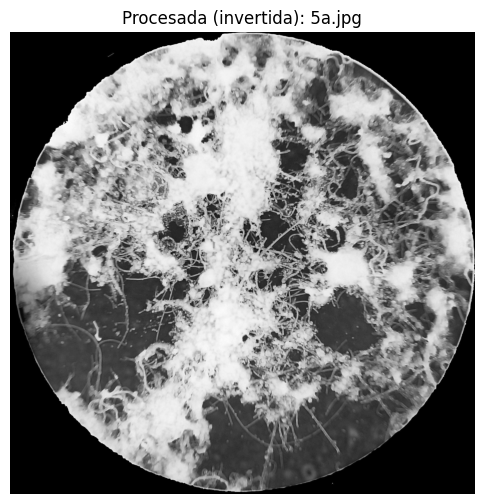

✅ Procesada, invertida y guardada: 5b.jpg


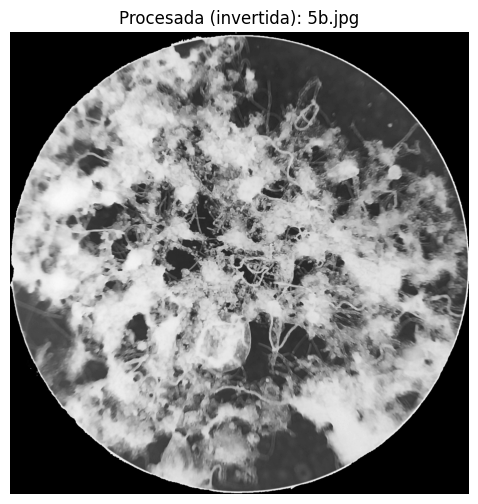

✅ Procesada, invertida y guardada: 5c.jpg


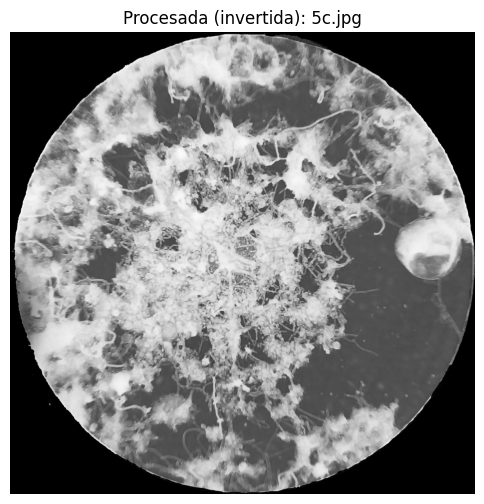

✅ Procesada, invertida y guardada: 5d.jpg


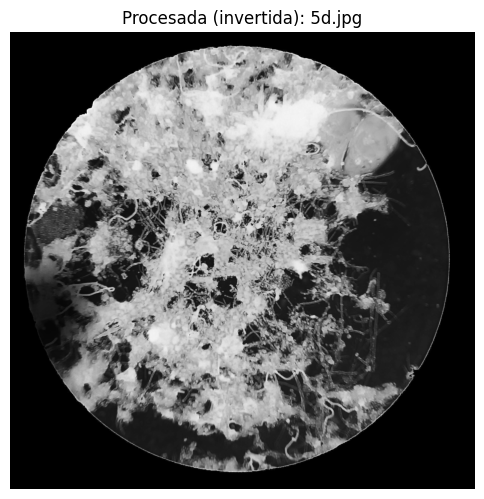

✅ Procesada, invertida y guardada: 5e.jpg


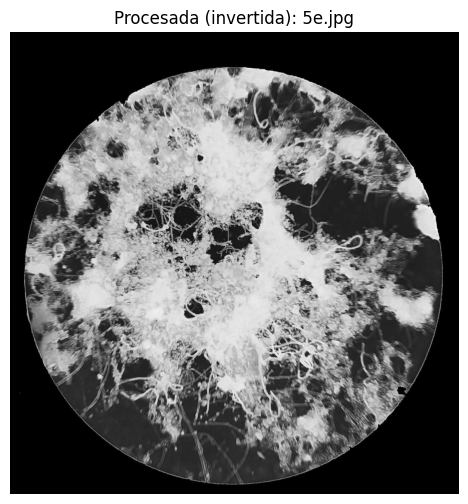

✅ Procesada, invertida y guardada: 5f.jpg


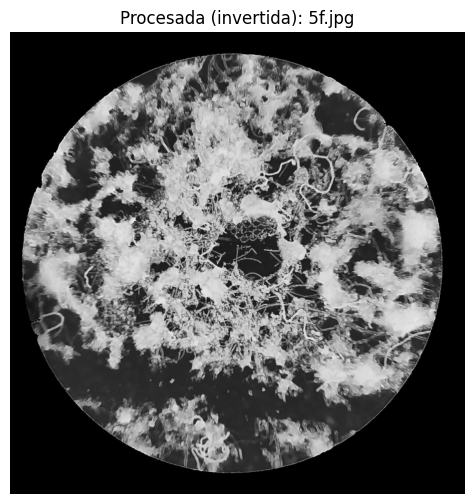

✅ Procesada, invertida y guardada: 5g.jpg


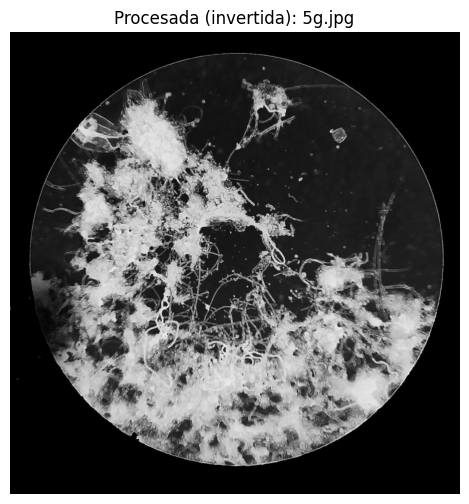

✅ Procesada, invertida y guardada: 5h.jpg


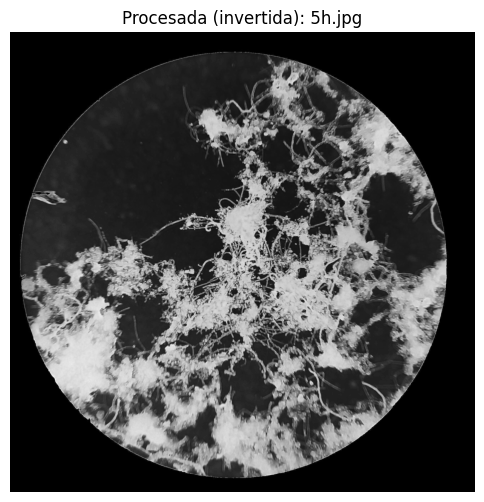

✅ Procesada, invertida y guardada: 5i.jpg


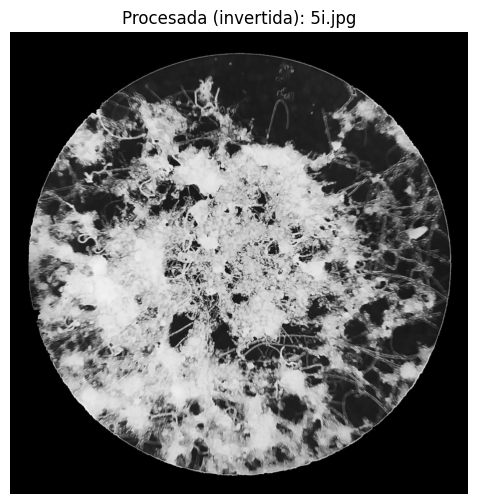

✅ Procesada, invertida y guardada: 5j.jpg


🎉 Todas las imágenes han sido procesadas, invertidas, mostradas y guardadas en:
C:\Users\PC\Desktop\indice de jenkins\procesadas\5_semana\procesadas_erosion


In [2]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

# === Configuración ===
ruta_base = Path(r"C:\Users\PC\Desktop\indice de jenkins\base de datos\5_semana")
ruta_salida = Path(r"C:\Users\PC\Desktop\indice de jenkins\procesadas\5_semana\procesadas_erosion")
PAUSAR_ENTRE_IMAGENES = False  # pon True si quieres pausar con ENTER como en tu ejemplo

# Crear carpeta de salida si no existe
ruta_salida.mkdir(parents=True, exist_ok=True)

# Kernel para erosión 2x2
kernel = np.ones((2, 2), np.uint8)

# Extensiones permitidas
exts = {".jpg", ".jpeg", ".png"}

# Obtener todas las imágenes válidas
archivos = [f for f in ruta_base.iterdir() if f.is_file() and f.suffix.lower() in exts]

print(f"🔍 Se encontraron {len(archivos)} imágenes para procesar.")

for archivo in archivos:
    # Leer imagen (mpimg puede devolver float [0,1] o uint8)
    img_color = mpimg.imread(archivo)

    # Asegurar rango uint8 [0,255] antes de usar OpenCV
    if img_color.dtype != np.uint8:
        img_u8 = (img_color * 255).clip(0, 255).astype(np.uint8)
    else:
        img_u8 = img_color

    # Convertir a escala de grises
    if img_u8.ndim == 3:
        # Manejo seguro si trae canal alpha
        if img_u8.shape[2] == 4:
            img_u8 = cv2.cvtColor(img_u8, cv2.COLOR_RGBA2RGB)
        img_gray = cv2.cvtColor(img_u8, cv2.COLOR_RGB2GRAY)
    else:
        img_gray = img_u8

    # Erosión dos veces
    eroded = cv2.erode(img_gray, kernel, iterations=2)

    # Filtro mediano
    median = cv2.medianBlur(eroded, ksize=3)

    # 🔄 Invertir colores (negativo) — aquí estaba el faltante
    inverted = 255 - median
    # (equivalente a: inverted = cv2.bitwise_not(median))

    # Guardar con el mismo nombre en la carpeta de salida
    nombre_salida = ruta_salida / archivo.name
    ok = cv2.imwrite(str(nombre_salida), inverted)
    if ok:
        print(f"✅ Procesada, invertida y guardada: {nombre_salida.name}")
    else:
        print(f"❌ Error al guardar: {nombre_salida.name}")

    # Mostrar resultado (como en tu ejemplo)
    plt.figure(figsize=(6, 6))
    plt.imshow(inverted, cmap='gray')
    plt.title(f"Procesada (invertida): {archivo.name}")
    plt.axis("off")
    plt.show()

    if PAUSAR_ENTRE_IMAGENES:
        input("Presiona ENTER para continuar...")

print("🎉 Todas las imágenes han sido procesadas, invertidas, mostradas y guardadas en:")
print(ruta_salida)


🔍 Se encontraron 4 imágenes para procesar.
✅ Procesada, invertida y guardada: 4a.jpg


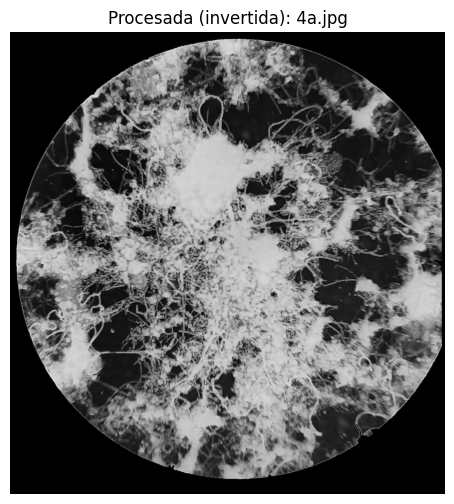

✅ Procesada, invertida y guardada: 4b.jpg


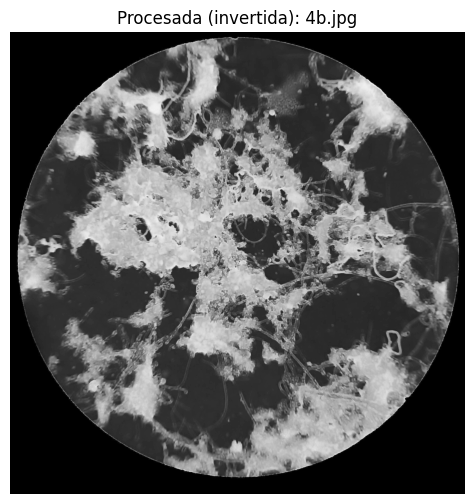

✅ Procesada, invertida y guardada: 4c.jpg


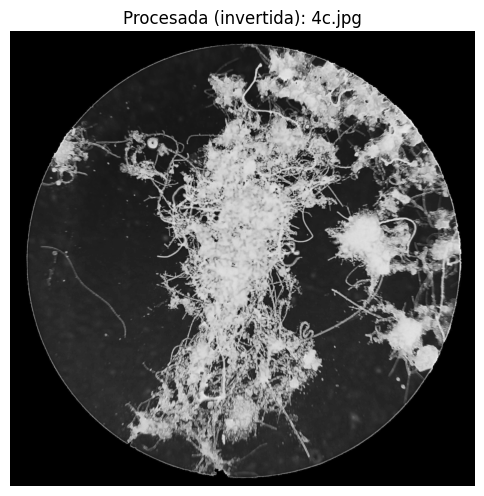

✅ Procesada, invertida y guardada: 4d.jpg


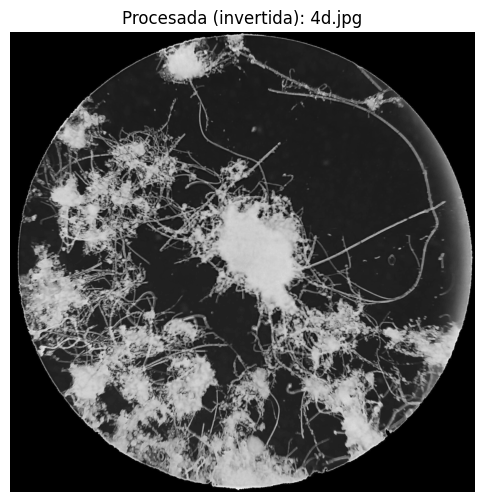

🎉 Todas las imágenes han sido procesadas, invertidas, mostradas y guardadas en:
C:\Users\PC\Desktop\indice de jenkins\procesadas\4_semana\procesadas_erosion


In [5]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

# === Configuración ===
ruta_base = Path(r"C:\Users\PC\Desktop\indice de jenkins\base de datos\4_semana")
ruta_salida = Path(r"C:\Users\PC\Desktop\indice de jenkins\procesadas\4_semana\procesadas_erosion")
PAUSAR_ENTRE_IMAGENES = False  # pon True si quieres pausar con ENTER como en tu ejemplo

# Crear carpeta de salida si no existe
ruta_salida.mkdir(parents=True, exist_ok=True)

# Kernel para erosión 2x2
kernel = np.ones((2, 2), np.uint8)

# Extensiones permitidas
exts = {".jpg", ".jpeg", ".png"}

# Obtener todas las imágenes válidas
archivos = [f for f in ruta_base.iterdir() if f.is_file() and f.suffix.lower() in exts]

print(f"🔍 Se encontraron {len(archivos)} imágenes para procesar.")

for archivo in archivos:
    # Leer imagen (mpimg puede devolver float [0,1] o uint8)
    img_color = mpimg.imread(archivo)

    # Asegurar rango uint8 [0,255] antes de usar OpenCV
    if img_color.dtype != np.uint8:
        img_u8 = (img_color * 255).clip(0, 255).astype(np.uint8)
    else:
        img_u8 = img_color

    # Convertir a escala de grises
    if img_u8.ndim == 3:
        # Manejo seguro si trae canal alpha
        if img_u8.shape[2] == 4:
            img_u8 = cv2.cvtColor(img_u8, cv2.COLOR_RGBA2RGB)
        img_gray = cv2.cvtColor(img_u8, cv2.COLOR_RGB2GRAY)
    else:
        img_gray = img_u8

    # Erosión dos veces
    eroded = cv2.erode(img_gray, kernel, iterations=2)

    # Filtro mediano
    median = cv2.medianBlur(eroded, ksize=3)

    # 🔄 Invertir colores (negativo) — aquí estaba el faltante
    inverted = 255 - median
    # (equivalente a: inverted = cv2.bitwise_not(median))

    # Guardar con el mismo nombre en la carpeta de salida
    nombre_salida = ruta_salida / archivo.name
    ok = cv2.imwrite(str(nombre_salida), inverted)
    if ok:
        print(f"✅ Procesada, invertida y guardada: {nombre_salida.name}")
    else:
        print(f"❌ Error al guardar: {nombre_salida.name}")

    # Mostrar resultado (como en tu ejemplo)
    plt.figure(figsize=(6, 6))
    plt.imshow(inverted, cmap='gray')
    plt.title(f"Procesada (invertida): {archivo.name}")
    plt.axis("off")
    plt.show()

    if PAUSAR_ENTRE_IMAGENES:
        input("Presiona ENTER para continuar...")

print("🎉 Todas las imágenes han sido procesadas, invertidas, mostradas y guardadas en:")
print(ruta_salida)


🔍 Se encontraron 5 imágenes para procesar.
✅ Procesada, invertida y guardada: 6a.jpg


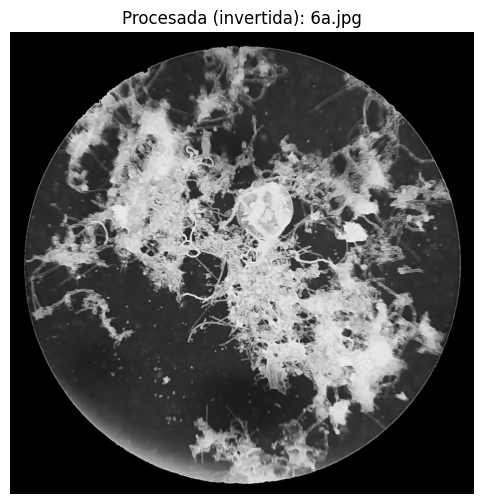

✅ Procesada, invertida y guardada: 6b.jpg


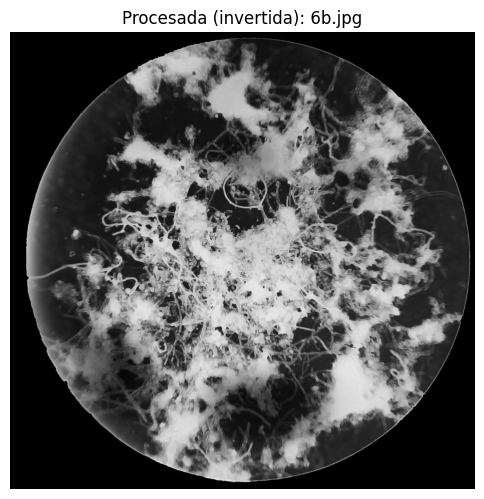

✅ Procesada, invertida y guardada: 6c.jpg


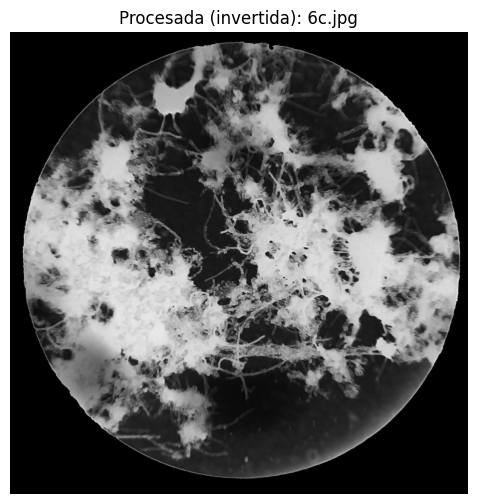

✅ Procesada, invertida y guardada: 6d.jpg


✅ Procesada, invertida y guardada: 6f.jpg


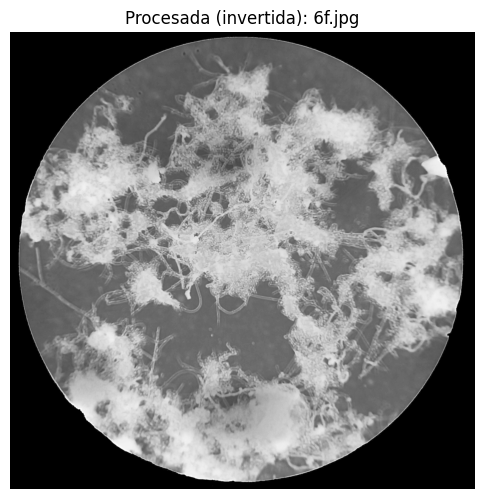

🎉 Todas las imágenes han sido procesadas, invertidas, mostradas y guardadas en:
C:\Users\PC\Desktop\indice de jenkins\procesadas\6_semana\procesadas_erosion


In [10]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

# === Configuración ===
ruta_base = Path(r"C:\Users\PC\Desktop\indice de jenkins\base de datos\6_semana")
ruta_salida = Path(r"C:\Users\PC\Desktop\indice de jenkins\procesadas\6_semana\procesadas_erosion")
PAUSAR_ENTRE_IMAGENES = False  # pon True si quieres pausar con ENTER como en tu ejemplo

# Crear carpeta de salida si no existe
ruta_salida.mkdir(parents=True, exist_ok=True)

# Kernel para erosión 2x2
kernel = np.ones((2, 2), np.uint8)

# Extensiones permitidas
exts = {".jpg", ".jpeg", ".png"}

# Obtener todas las imágenes válidas
archivos = [f for f in ruta_base.iterdir() if f.is_file() and f.suffix.lower() in exts]

print(f"🔍 Se encontraron {len(archivos)} imágenes para procesar.")

for archivo in archivos:
    # Leer imagen (mpimg puede devolver float [0,1] o uint8)
    img_color = mpimg.imread(archivo)

    # Asegurar rango uint8 [0,255] antes de usar OpenCV
    if img_color.dtype != np.uint8:
        img_u8 = (img_color * 255).clip(0, 255).astype(np.uint8)
    else:
        img_u8 = img_color

    # Convertir a escala de grises
    if img_u8.ndim == 3:
        # Manejo seguro si trae canal alpha
        if img_u8.shape[2] == 4:
            img_u8 = cv2.cvtColor(img_u8, cv2.COLOR_RGBA2RGB)
        img_gray = cv2.cvtColor(img_u8, cv2.COLOR_RGB2GRAY)
    else:
        img_gray = img_u8

    # Erosión dos veces
    eroded = cv2.erode(img_gray, kernel, iterations=2)

    # Filtro mediano
    median = cv2.medianBlur(eroded, ksize=3)

    # 🔄 Invertir colores (negativo) — aquí estaba el faltante
    inverted = 255 - median
    # (equivalente a: inverted = cv2.bitwise_not(median))

    # Guardar con el mismo nombre en la carpeta de salida
    nombre_salida = ruta_salida / archivo.name
    ok = cv2.imwrite(str(nombre_salida), inverted)
    if ok:
        print(f"✅ Procesada, invertida y guardada: {nombre_salida.name}")
    else:
        print(f"❌ Error al guardar: {nombre_salida.name}")

    # Mostrar resultado (como en tu ejemplo)
    plt.figure(figsize=(6, 6))
    plt.imshow(inverted, cmap='gray')
    plt.title(f"Procesada (invertida): {archivo.name}")
    plt.axis("off")
    plt.show()

    if PAUSAR_ENTRE_IMAGENES:
        input("Presiona ENTER para continuar...")

print("🎉 Todas las imágenes han sido procesadas, invertidas, mostradas y guardadas en:")
print(ruta_salida)


🔍 Se encontraron 6 imágenes para procesar.
✅ Procesada, invertida y guardada: 8a.jpg


✅ Procesada, invertida y guardada: 8b.jpg


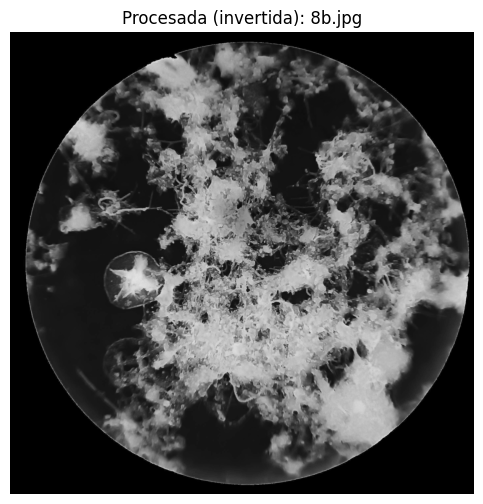

✅ Procesada, invertida y guardada: 8c.jpg


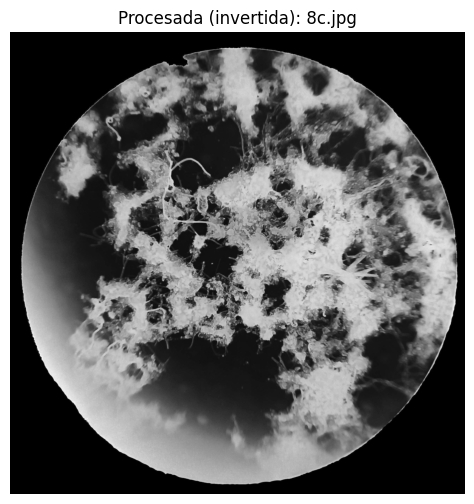

✅ Procesada, invertida y guardada: 8d.jpg


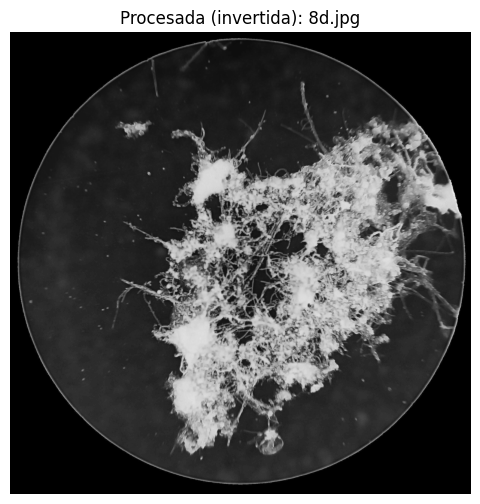

✅ Procesada, invertida y guardada: 8e.jpg


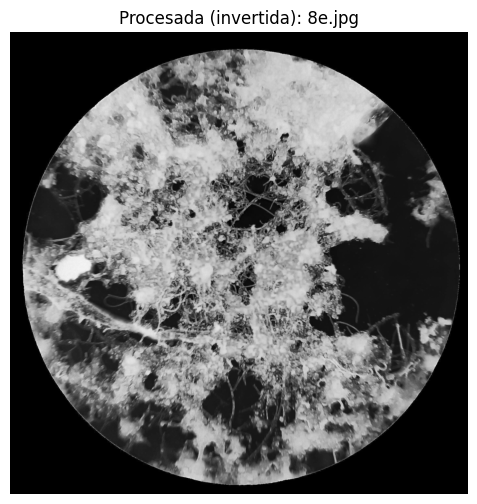

✅ Procesada, invertida y guardada: 8f.jpg


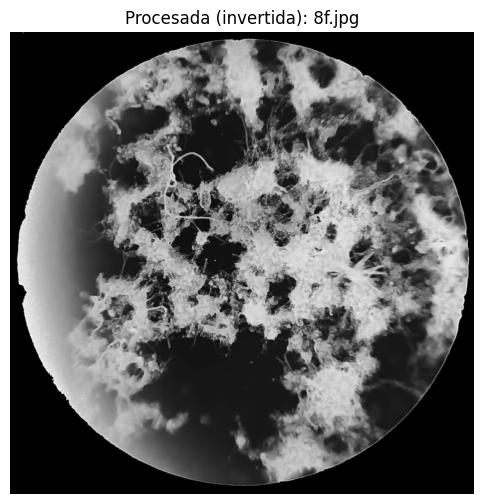

🎉 Todas las imágenes han sido procesadas, invertidas, mostradas y guardadas en:
C:\Users\PC\Desktop\indice de jenkins\procesadas\8_semana\procesadas_erosion


In [14]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

# === Configuración ===
ruta_base = Path(r"C:\Users\PC\Desktop\indice de jenkins\base de datos\8_semana")
ruta_salida = Path(r"C:\Users\PC\Desktop\indice de jenkins\procesadas\8_semana\procesadas_erosion")
PAUSAR_ENTRE_IMAGENES = False  # pon True si quieres pausar con ENTER como en tu ejemplo

# Crear carpeta de salida si no existe
ruta_salida.mkdir(parents=True, exist_ok=True)

# Kernel para erosión 2x2
kernel = np.ones((2, 2), np.uint8)

# Extensiones permitidas
exts = {".jpg", ".jpeg", ".png"}

# Obtener todas las imágenes válidas
archivos = [f for f in ruta_base.iterdir() if f.is_file() and f.suffix.lower() in exts]

print(f"🔍 Se encontraron {len(archivos)} imágenes para procesar.")

for archivo in archivos:
    # Leer imagen (mpimg puede devolver float [0,1] o uint8)
    img_color = mpimg.imread(archivo)

    # Asegurar rango uint8 [0,255] antes de usar OpenCV
    if img_color.dtype != np.uint8:
        img_u8 = (img_color * 255).clip(0, 255).astype(np.uint8)
    else:
        img_u8 = img_color

    # Convertir a escala de grises
    if img_u8.ndim == 3:
        # Manejo seguro si trae canal alpha
        if img_u8.shape[2] == 4:
            img_u8 = cv2.cvtColor(img_u8, cv2.COLOR_RGBA2RGB)
        img_gray = cv2.cvtColor(img_u8, cv2.COLOR_RGB2GRAY)
    else:
        img_gray = img_u8

    # Erosión dos veces
    eroded = cv2.erode(img_gray, kernel, iterations=2)

    # Filtro mediano
    median = cv2.medianBlur(eroded, ksize=3)

    # 🔄 Invertir colores (negativo) — aquí estaba el faltante
    inverted = 255 - median
    # (equivalente a: inverted = cv2.bitwise_not(median))

    # Guardar con el mismo nombre en la carpeta de salida
    nombre_salida = ruta_salida / archivo.name
    ok = cv2.imwrite(str(nombre_salida), inverted)
    if ok:
        print(f"✅ Procesada, invertida y guardada: {nombre_salida.name}")
    else:
        print(f"❌ Error al guardar: {nombre_salida.name}")

    # Mostrar resultado (como en tu ejemplo)
    plt.figure(figsize=(6, 6))
    plt.imshow(inverted, cmap='gray')
    plt.title(f"Procesada (invertida): {archivo.name}")
    plt.axis("off")
    plt.show()

    if PAUSAR_ENTRE_IMAGENES:
        input("Presiona ENTER para continuar...")

print("🎉 Todas las imágenes han sido procesadas, invertidas, mostradas y guardadas en:")
print(ruta_salida)
